In [1]:
#Importing necessary packages to extract data and call data easily
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.lines import Line2D
import astropy
from astropy.io import fits
from astropy.table import Table
import astropy.units as u
import pandas as pd
import seaborn as sns

In [2]:
#Has a very nice colorblind pallete if needed
colorblind_palette = sns.color_palette("colorblind")

In [3]:
#Extracting data from Douglass et. al. (2024)
index_list = [[0,9],[10,29],[30,40],[41,51],[52,59],[60,66],[67,72],[73,78],[79,85],[86,92],[93,98],[99,105],[106,112],[113,118],[119,125],
           [126,131],[132,138],[139,146],[147,151],[152,171],[172,174],[175,180],[181,182],[183,195],[196,212],[213,221],[222,229],[230,238],
           [239,242],[243,256],[257,262],[263,268],[269,277],[278,285],[286,291],[292,297],[298,303],[304,309],[310,315],[316,321],[322,327],
           [328,333],[334,335],[336,341],[342,346],[347,352],[353,354],[355,356],[357,358],[359,360],[361,366],[367,373],[374,379],[380,385],
           [386,391],[392,415],[416,429],[430,431]]
row_list = []
with open (r"C:\Users\callo\SURP Project\Tables-data\table2data_only.txt") as file:
    f = file.readlines()
    for i in f:
        a = []
        for n in range(len(index_list)):
            try:
                if n != 56 and n != 48 and n != 47 and n != 24 and n != 25 and n != 29 and n != 47 and n !=48 and n != 49 and n != 55:
                    a.append(float(i[index_list[n][0]:index_list[n][1]]))
                else:
                    a.append(str(i[index_list[n][0]:index_list[n][1]]))
            except:
                a.append(None)
        row_list.append(a)
    file.close()

In [4]:
# Getting rid of annoying verify errors from reading fits file of Curtis 2022 data set
from astropy.io.fits.verify import VerifyWarning
import warnings
warnings.simplefilter('ignore', category=VerifyWarning)

In [5]:
def cluster_age(n):
    '''
    defining a function to input literature ages
    into my dataframe
    '''
    n = n.Cluster
    if n == "IC_2391      ":
        return 42
    elif n == 'Collinder_135':
        return 40
    elif n == 'NGC_2451A    ':
        return 50
    elif n == 'NGC_2547     ':
        return 35.4
    elif n == 'IC_2602      ':
        return 42
    else:
        return 0
data1 = pd.DataFrame(row_list,columns=[f"Column_{i+1}" for i in range(len(row_list[0]))])
data1 = data1.rename(columns = {'Column_1': 'TIC','Column_2': 'Gaia','Column_3': 'RAdeg','Column_4': 'DEdeg','Column_5': 'PMRA','Column_6': 'PMDE','Column_7': 'plx','Column_8': 'plxC','Column_9': 'RUWE','Column_10': 'Gmag','Column_11': 'e_Gmag','Column_12': 'GmagC','Column_13': 'BPmag','Column_14': 'e_BPmag','Column_15': 'RPmag','Column_16': 'e_RPmag','Column_17': 'Tmag','Column_18': 'Rcont','Column_19': 'o_Rcont','Column_20': 'HDB-MProb','Column_21': 'HDB-Clst','Column_22': 'HDB-Stab','Column_23': 'MemBool','Column_24': 'ADis-GES','Column_25': 'GES','Column_26': 'GES-Clst','Column_27': 'GES-MProb','Column_28': 'ADis-CG','Column_29': 'CG-MemProb','Column_30': 'CG-Clst','Column_31': 'AV','Column_32': 'e_AV','Column_33': 'Dis','Column_34': 'e_Dis','Column_35': 'logA','Column_36': 'e_logA','Column_37': 'Mass','Column_38': 'e_Mass','Column_39': 'logTeff','Column_40': 'e_logTeff','Column_41': 'Prot1','Column_42': 'Pw1','Column_43': 'Q1','Column_44': 'Sig','Column_45': 'Prot2','Column_46': 'Pw2','Column_47': 'Q2','Column_48': 'MP?','Column_49': 'SE?','Column_50': 'Bl?','Column_51': 'CN-Sep','Column_52': 'CN-MagDiff','Column_53': 'BN-Sep','Column_54': 'BN-MagDiff','Column_55': 'Lit-Per','Column_56': 'r_Lit-Per','Column_57': 'Cluster','Column_58': 'to-plot'})
data1['Age'] = data1.apply(cluster_age, axis = 1)

data1 = data1.rename(columns = {'Prot1':'Prot'})
data1 = data1.rename(columns = {'CG-MemProb':'Pmemb'})
pd.set_option('display.max_columns', 100)
data1

,TIC,Gaia,RAdeg,DEdeg,PMRA,PMDE,plx,plxC,RUWE,Gmag,e_Gmag,GmagC,BPmag,e_BPmag,RPmag,e_RPmag,Tmag,Rcont,o_Rcont,HDB-MProb,HDB-Clst,HDB-Stab,MemBool,ADis-GES,GES,GES-Clst,GES-MProb,ADis-CG,Pmemb,CG-Clst,AV,e_AV,Dis,e_Dis,logA,e_logA,Mass,e_Mass,logTeff,e_logTeff,Prot,Pw1,Q1,Sig,Prot2,Pw2,Q2,MP?,SE?,Bl?,CN-Sep,CN-MagDiff,BN-Sep,BN-MagDiff,Lit-Per,r_Lit-Per,Cluster,to-plot,Age
0,NaN,5.318533e+18,130.871579,-52.691608,-1.510,4.182,1.793,1.812,1.144,18.874,0.008,18.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1.0,0.000,0.0,1.775085,08432928-5241284,IC2391,0.9872,NaN,NaN,,0.090,0.073,731.949,25.572,7.670,0.053,0.415,0.014,3.505,0.011,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,n,7.15,-8.94,57.31,-1.55,NaN,,IC_2391,0.0,42.0
1,44999952.0,5.317682e+18,129.502314,-55.105625,-23.494,24.976,6.465,6.513,1.140,16.079,0.001,16.079,17.939,0.011,14.772,0.002,14.674,NaN,NaN,0.347092,0.0,0.247,1.0,NaN,,,NaN,NaN,NaN,,0.136,0.046,154.230,1.474,7.723,0.029,0.379,0.009,3.488,0.001,0.31,0.250,0.0,0.029,NaN,NaN,2.0,n,m,y,5.42,0.41,30.68,1.69,NaN,,IC_2391,0.0,42.0
2,45049176.0,5.318059e+18,129.795440,-54.016857,-24.058,24.196,6.714,6.759,1.150,17.373,0.001,17.373,19.529,0.054,16.026,0.005,15.896,NaN,NaN,0.846621,0.0,0.247,1.0,NaN,,,NaN,0.008449,0.9,IC_2391,0.237,0.006,156.702,0.476,8.405,0.009,0.245,0.004,3.482,0.002,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,12.76,-2.28,58.07,0.30,NaN,,IC_2391,1.0,42.0
3,45050711.0,5.317838e+18,129.793134,-54.603170,-25.183,24.407,6.818,6.861,0.999,16.838,0.001,16.838,18.694,0.027,15.545,0.005,15.452,NaN,NaN,0.634696,0.0,0.247,1.0,NaN,,,NaN,0.006183,1.0,IC_2391,0.234,0.014,148.201,1.293,8.225,0.018,0.310,0.005,3.501,0.001,0.78,0.161,0.0,0.028,NaN,NaN,2.0,n,m,y,8.01,2.65,8.01,2.65,NaN,,IC_2391,1.0,42.0
4,45181378.0,5.317840e+18,129.879736,-54.513893,-25.376,24.585,6.850,6.891,1.006,17.833,0.002,17.832,19.908,0.048,16.489,0.004,16.350,NaN,NaN,0.559731,0.0,0.247,1.0,NaN,,,NaN,0.002460,1.0,IC_2391,0.077,0.051,147.957,2.114,8.103,0.029,0.151,0.004,3.462,0.003,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,6.85,-0.34,33.87,1.20,NaN,,IC_2391,1.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,912058973.0,5.239934e+18,160.074630,-63.693865,-17.230,9.902,6.581,6.581,1.068,17.419,0.004,17.419,NaN,NaN,NaN,NaN,16.975,NaN,NaN,0.798193,2.0,0.363,1.0,NaN,,,NaN,0.002342,1.0,IC_2602,0.092,0.086,152.956,3.046,7.876,0.049,0.116,0.009,3.427,0.006,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,0.90,1.91,54.67,4.67,NaN,,IC_2602,1.0,42.0
2367,913701079.0,5.241344e+18,163.114120,-62.761163,-18.669,8.392,6.536,6.536,1.303,18.192,0.004,18.166,20.343,0.196,16.558,0.042,16.854,NaN,NaN,0.528324,2.0,0.363,1.0,NaN,,,NaN,NaN,NaN,,0.100,0.091,157.417,5.347,7.975,0.052,0.105,0.013,3.430,0.012,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,2.55,2.39,54.16,4.58,NaN,,IC_2602,0.0,42.0
2368,913850848.0,5.241448e+18,160.269351,-63.279238,-19.615,9.988,6.457,6.463,3.721,12.600,0.003,12.600,12.444,0.078,10.887,0.003,11.888,NaN,NaN,0.632148,2.0,0.363,1.0,NaN,,,NaN,NaN,NaN,,0.040,0.066,154.833,1.828,6.806,0.190,0.820,0.060,3.588,0.007,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,0.92,0.52,0.92,0.52,NaN,,IC_2602,0.0,42.0
2369,913996012.0,5.241541e+18,162.112429,-62.756388,-18.780,9.272,6.662,6.706,1.142,16.213,0.001,16.213,17.861,0.018,14.926,0.004,15.028,NaN,NaN,0.676934,2.0,0.363,1.0,NaN,,,NaN,0.007805,1.0,IC_2602,0.177,0.066,149.846,1.221,7.842,0.050,0.346,0.029,3.512,0.006,0.82,0.246,0.0,0.027,NaN,NaN,2.0,n,n,y,2.27,-4.86,57.54,3.87,NaN,,IC_2602,1.0,42.0


In [6]:
def cluster_litage(n):
    '''
    defining a function to input literature ages
    into my dataframe
    '''
    n = n.Cluster
    if n == "Pleiades":
        return 125
    elif n == 'M50     ':
        return 130
    elif n == 'NGC2516 ':
        return 150
    elif n == 'M37     ':
        return 550
    elif n == 'Praesepe':
        return 580
    elif n == 'NGC6811 ':
        return 1000
    else:
        return 0

In [7]:
#Data from Godoy-River et. al. (2021)
asu = fits.open(r"C:\Users\callo\SURP Project\Tables-data\Godoy-Rivera.fit")
tbl = Table.read(asu[1], format = 'fits')
data2 = tbl.to_pandas()
data2['Age'] = data2.apply(cluster_litage, axis = 1)
data2.Cluster.unique()
data2 = data2.rename(columns = {'Period':'Prot'})
data2

,Cluster,SourceID,Prot,GaiaDR2,RA_ICRS,DE_ICRS,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,BPmag,RPmag,BP-RP,Delta,Pmemb,Class,MG0proj,Mass,Teff,FlagMT,SimbadName,_RA_icrs,_DE_icrs,Age
0,NGC2547,N2547-1-1-2501,2.758,5516065840159179264,122.836148,-48.822933,2.4996,0.0757,-8.561,0.131,4.153,0.153,16.988308,18.315580,15.812117,2.503464,0.435,1.0,probable-member,8.936,0.486,3355,bright,[IHA2008] N2547-1-1-2501,122.836204,-48.822950,0
1,NGC2547,N2547-1-1-3141,9.523,5516067356286460288,122.884898,-48.800283,2.5006,0.0606,-8.601,0.102,4.288,0.126,16.794930,18.100956,15.646866,2.454090,0.442,1.0,probable-member,8.800,0.512,3392,bright,[IHA2008] N2547-1-1-3141,122.884954,-48.800302,0
2,NGC2547,N2547-1-1-3640,3.213,5515879992633563264,122.998556,-48.782404,2.5708,0.0223,-8.931,0.039,4.028,0.041,14.984806,15.777567,14.097954,1.679613,0.390,1.0,probable-member,7.071,0.727,4189,bright,[IHA2008] N2547-1-1-3640,122.998614,-48.782422,0
3,NGC2547,N2547-1-1-3903,0.991,5516067665524140288,122.843938,-48.774982,0.4255,0.0208,-2.386,0.037,0.442,0.044,14.513122,15.219021,13.701118,1.517903,18.432,0.0,non-member,6.781,0.745,4403,bright,[IHA2008] N2547-1-1-3903,122.843953,-48.774983,0
4,NGC2547,N2547-1-1-4637,3.071,5516067906042280960,122.945408,-48.748296,3.4942,0.0504,-17.998,0.089,11.424,0.100,16.265790,17.627079,15.083997,2.543082,14.422,0.0,non-member,9.044,0.464,3326,bright,[IHA2008] N2547-1-1-4637,122.945525,-48.748345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,NGC6811,KIC 9716112,9.560,2128122038511307520,294.238386,46.432832,0.6888,0.0672,-3.287,0.116,-9.096,0.129,14.824026,15.135662,14.283571,0.852091,0.000,0.0,no-info,4.706,1.039,5881,bright,KIC 9716112,294.238407,46.432871,1000
3488,NGC6811,KIC 9594645,10.440,2128107783519547648,294.415907,46.258521,0.9071,0.0275,-2.855,0.053,-7.820,0.056,15.176926,15.562139,14.625349,0.936790,4.841,0.0,non-member,5.087,0.972,5642,bright,KIC 9594645,294.415925,46.258555,1000
3489,NGC6811,KIC 9775381,10.470,2128172276748660224,293.850776,46.506125,0.0000,0.0000,0.000,0.000,0.000,0.000,15.209151,15.663594,14.563061,1.100534,0.000,0.0,no-info,5.767,0.862,5205,bright,KIC 9775381,293.850776,46.506125,1000
3490,NGC6811,KIC 9595724,12.660,2080089877353287040,294.822120,46.293945,0.9683,0.0171,2.478,0.034,-6.100,0.034,14.511868,14.848270,14.017180,0.831090,29.866,0.0,non-member,4.607,1.058,5944,bright,KIC 9595724,294.822105,46.293971,1000


In [8]:
#Filtering the data by cluster
filt1 = data1['Cluster']== 'IC_2391      '
IC_2391 = data1[filt1]

filt2 = data1['Cluster']== 'Collinder_135'
Collinder_135 = data1[filt2]

filt3 = data1['Cluster']== 'NGC_2451A    '
NGC_2451A = data1[filt3]

filt4 = data1['Cluster']== 'NGC_2547     '
NGC_2547 = data1[filt4]

filt5 = data1['Cluster']== 'IC_2602      '
IC_2602 = data1[filt5]

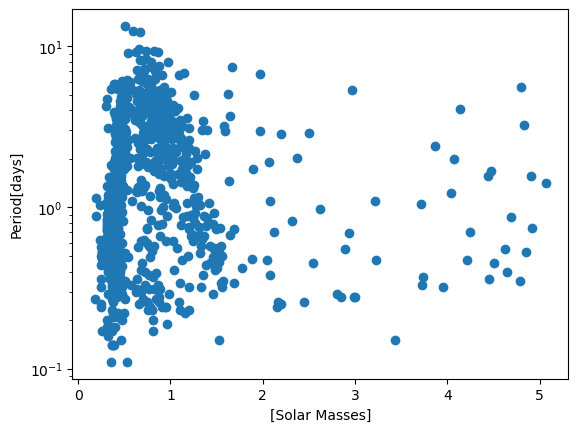

In [9]:
#Checking to see if the distrubution trend matches agreed upon literature plots
plt.scatter(data1['Mass'], data1['Prot'])

plt.xlabel('[Solar Masses]')
plt.ylabel('Period[days]')
plt.yscale('log')
#plt.savefig('test_mass_prot.png')

Text(0, 0.5, 'Period[days]')

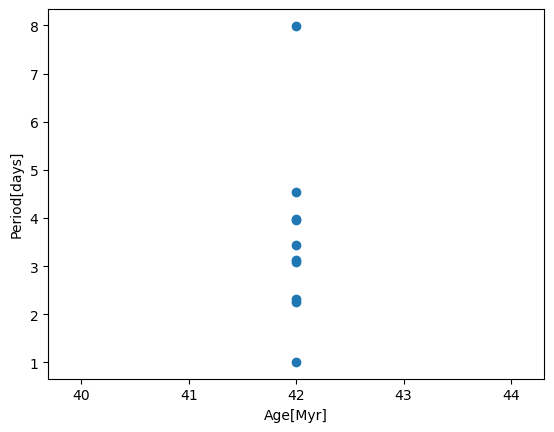

In [10]:
#Binning cluster by mass
filt6 = (IC_2391['Mass']>=0.9) & (IC_2391['Mass']<=1.1)
IC_2391_filt = IC_2391[filt6]

plt.scatter(IC_2391_filt['Age'], IC_2391_filt['Prot'])

plt.xlabel('Age[Myr]')
plt.ylabel('Period[days]')
#plt.savefig('binnedmass_age_prot.png')

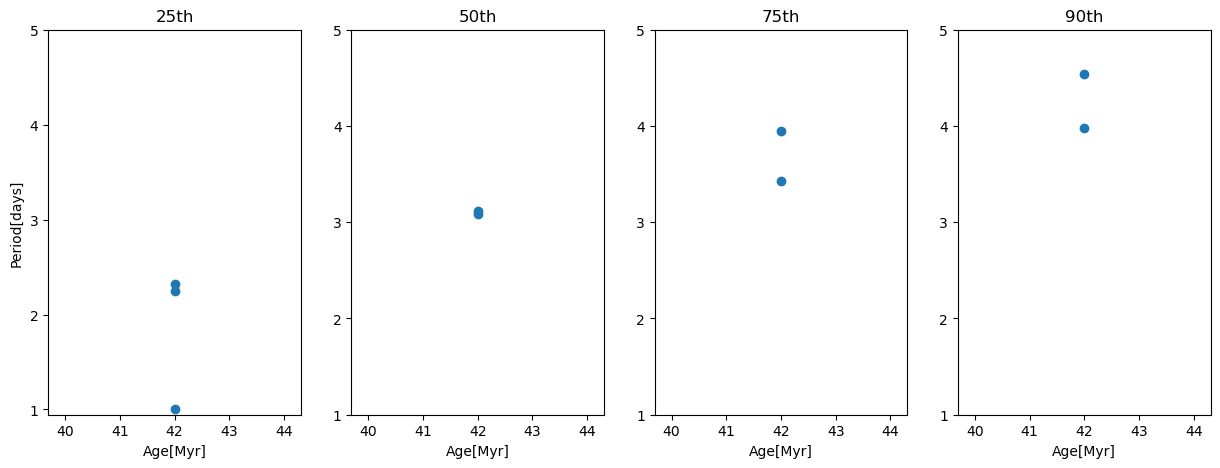

In [11]:
#Plotting all 4 of my percentiles and seeing what it looks like
filt7 = (IC_2391_filt['Prot'] <= IC_2391_filt.Prot.quantile(q = .25))
perc_25 = IC_2391_filt[filt7]
filt8 = (IC_2391_filt['Prot'] <= IC_2391_filt.Prot.quantile(q=.50)) & (IC_2391_filt['Prot'] >= IC_2391_filt.Prot.quantile(q = .25))
perc_50 = IC_2391_filt[filt8]
filt9 = (IC_2391_filt['Prot'] <= IC_2391_filt.Prot.quantile(q = .75)) & (IC_2391_filt['Prot'] >= IC_2391_filt.Prot.quantile(q=.50))
perc_75 = IC_2391_filt[filt9]
filt10 = (IC_2391_filt['Prot'] <= IC_2391_filt.Prot.quantile(q = .9)) &(IC_2391_filt['Prot'] >= IC_2391_filt.Prot.quantile(q = .75))
perc_90 = IC_2391_filt[filt10]

fig, ax = plt.subplots(1, 4, figsize = [15,5])
dat = [perc_25, perc_50, perc_75, perc_90]

for n,cut in enumerate(dat):
    #poly = np.polyfit(cut['Age'], cut['Prot'], 2)
    #fit = np.poly1d(poly)

    #xs1 = np.linspace(min(cut['Age']), max(cut['Age']), 500)
    
    #ax[n].plot(xs1, fit(xs1))
    ax[n].scatter(cut['Age'], cut['Prot'])
    ax[n].set_yticks([1, 2 ,3 ,4 ,5])
    ax[0].set_title('25th')
    ax[1].set_title('50th')
    ax[2].set_title('75th')
    ax[3].set_title('90th')
    ax[n].set_xlabel('Age[Myr]')
    ax[0].set_ylabel('Period[days]')
#plt.savefig('percent_sep.png')

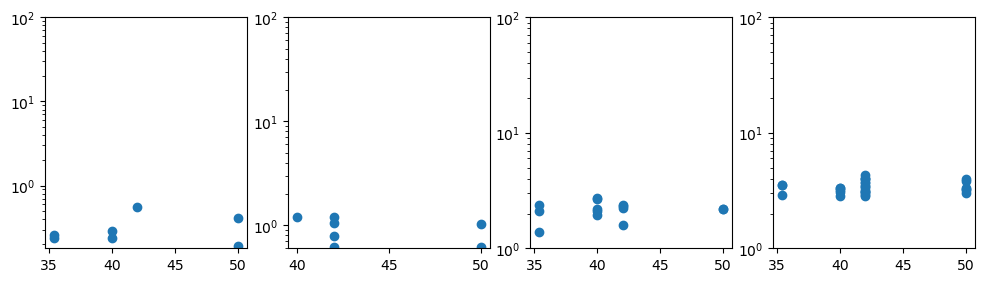

In [12]:
filt11 = (data1['Pmemb']>=0.7) & (data1['Pmemb']<=1.0)
mem = data1[filt11]

filt13 = (mem['Prot'] <= mem.Prot.quantile(q = .25))
perc_25 = mem[filt13]
filt14 = (mem['Prot'] <= mem.Prot.quantile(q=.50)) & (mem['Prot'] >= mem.Prot.quantile(q = .25))
perc_50 = mem[filt14]
filt15 = (mem['Prot'] <= mem.Prot.quantile(q = .75)) & (mem['Prot'] >= mem.Prot.quantile(q=.50))
perc_75 = mem[filt15]
filt16 = (mem['Prot'] <= mem.Prot.quantile(q = .9)) &(mem['Prot'] >= mem.Prot.quantile(q = .75))
perc_90 = mem[filt16]

dat = [perc_25, perc_50, perc_75, perc_90]
fig, ax = plt.subplots(1, 4, figsize = [12, 3])

for n,bins in enumerate(dat):
    filt17 = (bins['Mass']>=0.9) & (bins['Mass']<=1.1)
    mass1 = bins[filt17]
    
    ax[n].scatter(mass1['Age'], mass1['Prot'])
    ax[n].set_yscale('log')
    ax[n].set_yticks([1, 10, 100])

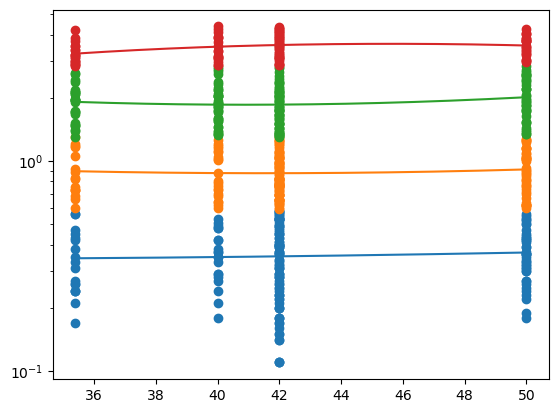

In [13]:
filt81 = (mem['Prot'] <= mem.Prot.quantile(q = .10))
perc_10 = mem[filt81]
filt13 = (mem['Prot'] <= mem.Prot.quantile(q = .25))
perc_25 = mem[filt13]
filt14 = (mem['Prot'] <= mem.Prot.quantile(q=.50)) & (mem['Prot'] >= mem.Prot.quantile(q = .25))
perc_50 = mem[filt14]
filt15 = (mem['Prot'] <= mem.Prot.quantile(q = .75)) & (mem['Prot'] >= mem.Prot.quantile(q=.50))
perc_75 = mem[filt15]
filt16 = (mem['Prot'] <= mem.Prot.quantile(q = .9)) &(mem['Prot'] >= mem.Prot.quantile(q = .75))
perc_90 = mem[filt16]

dat = [perc_25, perc_50, perc_75, perc_90]

for m in dat:
    poly = np.polyfit(m['Age'], m['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(m['Age']), max(m['Age']), 500)
    
    plt.plot(xs1, fit(xs1))
    plt.scatter(m['Age'], m['Prot'])
    plt.yscale('log')
    

4.85

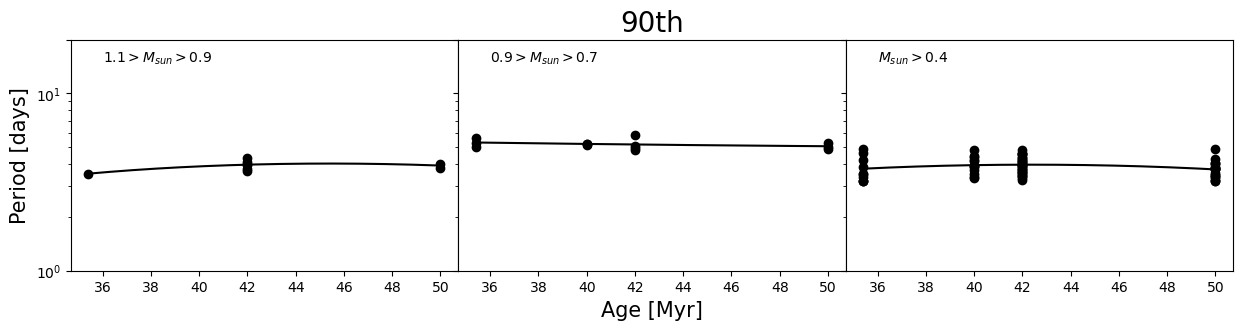

In [14]:
filt18 = (mem['Mass']>=0.9) & (mem['Mass']<=1.1)
mass1 = mem[filt18]
filt19 = (mem['Mass']>=0.7) & (mem['Mass']<=0.9)
mass2 = mem[filt19]
filt20 = (mem['Mass']>=0.4)
mass3 = mem[filt20]

dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 3], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt21 = (m['Prot'] <= m.Prot.quantile(q = .9)) &(m['Prot'] >= m.Prot.quantile(q = .75))
    perc_90 = m[filt21]
    
    poly = np.polyfit(perc_90['Age'], perc_90['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_90['Age']), max(perc_90['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_90['Age'], perc_90['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_yticks([1, 10, 20])

ax[0].text(36, 15, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 15, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 15, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('90th', size = 20)
#plt.savefig('90th.png')
perc_90.Prot.max()


2.41152

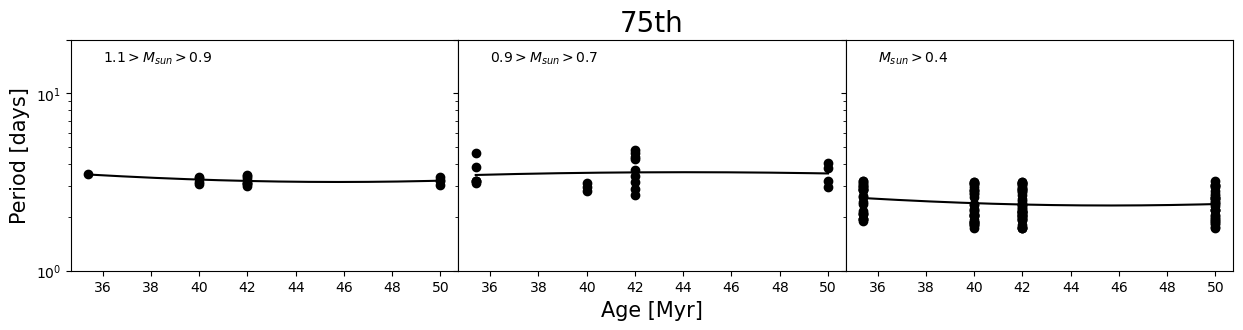

In [15]:
dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 3], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt22 = (m['Prot'] <= m.Prot.quantile(q = .75)) &(m['Prot'] >= m.Prot.quantile(q = .50))
    perc_75 = m[filt22]
    
    poly = np.polyfit(perc_75['Age'], perc_75['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_75['Age']), max(perc_75['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_75['Age'], perc_75['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_yticks([1, 10, 20])

ax[0].text(36, 15, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 15, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 15, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('75th', size = 20)
#plt.savefig('75th.png')
perc_75.Prot.mean()

Text(0.5, 1.0, '50th')

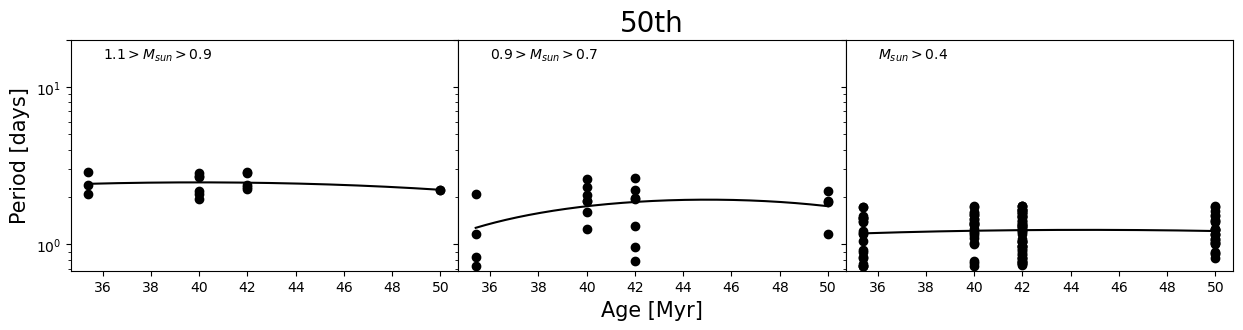

In [16]:
dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 3], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt23 = (m['Prot'] <= m.Prot.quantile(q = .50)) &(m['Prot'] >= m.Prot.quantile(q = .25))
    perc_50 = m[filt23]
    
    poly = np.polyfit(perc_50['Age'], perc_50['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_50['Age']), max(perc_50['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_50['Age'], perc_50['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_yticks([1, 10, 20])

ax[0].text(36, 15, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 15, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 15, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('50th', size = 20)
#plt.savefig('50th.png')

Text(0.5, 1.0, '25th')

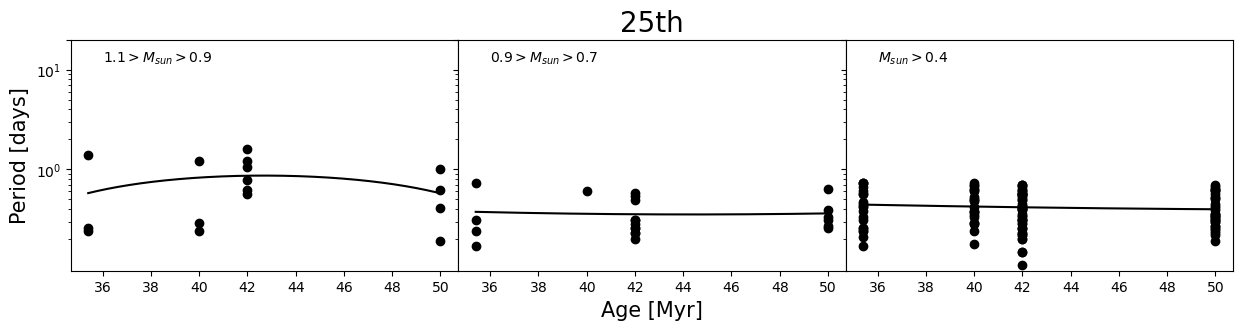

In [17]:
dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 3], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt24 = (m['Prot'] <= m.Prot.quantile(q = .25)) 
    perc_25 = m[filt24]
    
    poly = np.polyfit(perc_25['Age'], perc_25['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_25['Age']), max(perc_25['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_25['Age'], perc_25['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_yticks([1, 10, 20])

ax[0].text(36, 12, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 12, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 12, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('25th', size = 20)
#plt.savefig('25th.png')

In [18]:
filt25 = data2['Cluster']== 'Pleiades'
Pleiades = data2[filt25]

filt26 = data2['Cluster']== 'M50     '
M50 = data2[filt26]

filt27 = data2['Cluster']== 'NGC2516 '
NGC2516 = data2[filt27]

filt28 = data2['Cluster']== 'M37     '
M37 = data2[filt28]

filt29 = data2['Cluster']== 'Praesepe'
Praesepe = data2[filt29]

filt30 = data2['Cluster']== 'NGC6811 '
NGC6811 = data2[filt30]

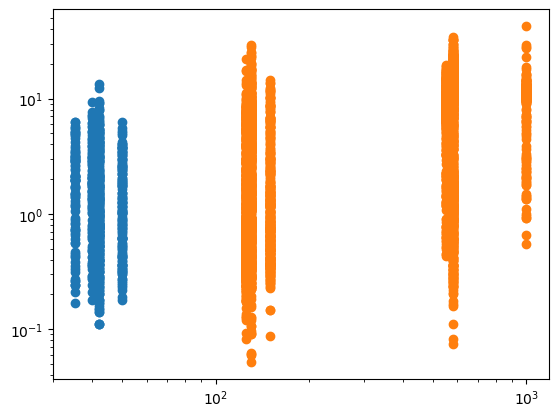

In [19]:
plt.scatter(mem['Age'], mem['Prot'])
plt.scatter(data2['Age'], data2['Prot'])
plt.xscale('log')
plt.yscale('log')

In [20]:
data3 = pd.concat([data1, data2])
data3

,TIC,Gaia,RAdeg,DEdeg,PMRA,PMDE,plx,plxC,RUWE,Gmag,e_Gmag,GmagC,BPmag,e_BPmag,RPmag,e_RPmag,Tmag,Rcont,o_Rcont,HDB-MProb,HDB-Clst,HDB-Stab,MemBool,ADis-GES,GES,GES-Clst,GES-MProb,ADis-CG,Pmemb,CG-Clst,AV,e_AV,Dis,e_Dis,logA,e_logA,Mass,e_Mass,logTeff,e_logTeff,Prot,Pw1,Q1,Sig,Prot2,Pw2,Q2,MP?,SE?,Bl?,CN-Sep,CN-MagDiff,BN-Sep,BN-MagDiff,Lit-Per,r_Lit-Per,Cluster,to-plot,Age,SourceID,GaiaDR2,RA_ICRS,DE_ICRS,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,BP-RP,Delta,Class,MG0proj,Teff,FlagMT,SimbadName,_RA_icrs,_DE_icrs
0,NaN,5.318533e+18,130.871579,-52.691608,-1.510,4.182,1.7930,1.812,1.144,18.874000,0.008,18.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1.0,0.000,0.0,1.775085,08432928-5241284,IC2391,0.9872,NaN,NaN,,0.090,0.073,731.949,25.572,7.670,0.053,0.415,0.014,3.505,0.011,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,n,7.15,-8.94,57.31,-1.55,NaN,,IC_2391,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44999952.0,5.317682e+18,129.502314,-55.105625,-23.494,24.976,6.4650,6.513,1.140,16.079000,0.001,16.079,17.939000,0.011,14.772000,0.002,14.674,NaN,NaN,0.347092,0.0,0.247,1.0,NaN,,,NaN,NaN,NaN,,0.136,0.046,154.230,1.474,7.723,0.029,0.379,0.009,3.488,0.001,0.31,0.250,0.0,0.029,NaN,NaN,2.0,n,m,y,5.42,0.41,30.68,1.69,NaN,,IC_2391,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45049176.0,5.318059e+18,129.795440,-54.016857,-24.058,24.196,6.7140,6.759,1.150,17.373000,0.001,17.373,19.529000,0.054,16.026000,0.005,15.896,NaN,NaN,0.846621,0.0,0.247,1.0,NaN,,,NaN,0.008449,0.9,IC_2391,0.237,0.006,156.702,0.476,8.405,0.009,0.245,0.004,3.482,0.002,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,12.76,-2.28,58.07,0.30,NaN,,IC_2391,1.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45050711.0,5.317838e+18,129.793134,-54.603170,-25.183,24.407,6.8180,6.861,0.999,16.838000,0.001,16.838,18.694000,0.027,15.545000,0.005,15.452,NaN,NaN,0.634696,0.0,0.247,1.0,NaN,,,NaN,0.006183,1.0,IC_2391,0.234,0.014,148.201,1.293,8.225,0.018,0.310,0.005,3.501,0.001,0.78,0.161,0.0,0.028,NaN,NaN,2.0,n,m,y,8.01,2.65,8.01,2.65,NaN,,IC_2391,1.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45181378.0,5.317840e+18,129.879736,-54.513893,-25.376,24.585,6.8500,6.891,1.006,17.833000,0.002,17.832,19.908000,0.048,16.489000,0.004,16.350,NaN,NaN,0.559731,0.0,0.247,1.0,NaN,,,NaN,0.002460,1.0,IC_2391,0.077,0.051,147.957,2.114,8.103,0.029,0.151,0.004,3.462,0.003,NaN,NaN,7.0,NaN,NaN,NaN,7.0,,,y,6.85,-0.34,33.87,1.20,NaN,,IC_2391,1.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,NaN,NaN,NaN,NaN,NaN,NaN,0.6888,NaN,NaN,14.824026,NaN,NaN,15.135662,NaN,14.283571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.039,NaN,NaN,NaN,9.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NGC6811,NaN,1000.0,KIC 9716112,2.128122e+18,294.238386,46.432832,0.0672,-3.287,0.116,-9.096,0.129,0.852091,0.000,no-info,4.706,5881.0,bright,KIC 9716112,294.238407,46.432871
3488,NaN,NaN,NaN,NaN,NaN,NaN,0.9071,NaN,NaN,15.176926,NaN,NaN,15.562139,NaN,14.625349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972,NaN,NaN,NaN,10.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NGC6811,NaN,1000.0,KIC 9594645,2.128108e+18,294.415907,46.258521,0.0275,-2.855,0.053,-7.820,0.056,0.936790,4.841,non-member,5.087,5642.0,bright,KIC 9594645,294.415925,46.258555
3489,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,15.209151,NaN,NaN,15.663594,NaN,14.563061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.862,NaN,NaN,NaN,10.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [21]:
filt31 = (data3['Pmemb']>=0.7) & (data3['Pmemb']<=1.0)
mem = data3[filt31]

([<matplotlib.axis.YTick at 0x2b6ddf46910>,
 [Text(0, 1, '$\\mathdefault{10^{0}}$'),
  Text(0, 10, '$\\mathdefault{10^{1}}$')])

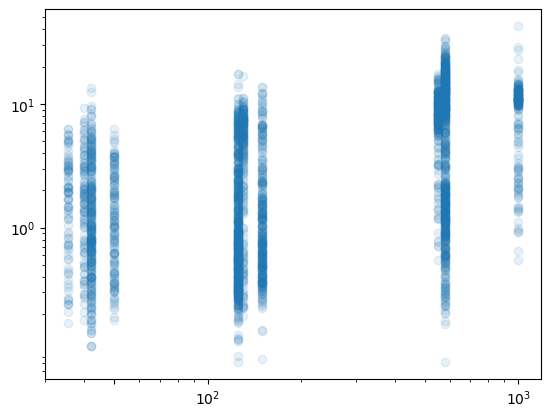

In [22]:
plt.scatter(mem['Age'], mem['Prot'], alpha = 0.1)
plt.xscale('log')
plt.yscale('log')
plt.xticks([50, 100, 1000])
plt.yticks([1, 10])

In [23]:
#Redifines all the member cut filters to new datraframe
filt13 = (mem['Prot'] <= mem.Prot.quantile(q = .25))
perc_25 = mem[filt13]
filt14 = (mem['Prot'] <= mem.Prot.quantile(q=.50)) & (mem['Prot'] >= mem.Prot.quantile(q = .25))
perc_50 = mem[filt14]
filt15 = (mem['Prot'] <= mem.Prot.quantile(q = .75)) & (mem['Prot'] >= mem.Prot.quantile(q=.50))
perc_75 = mem[filt15]
filt16 = (mem['Prot'] <= mem.Prot.quantile(q = .9)) &(mem['Prot'] >= mem.Prot.quantile(q = .75))
perc_90 = mem[filt16]
#Redfines all mass bins for new dataframe
filt18 = (mem['Mass']>=0.9) & (mem['Mass']<=1.1)
mass1 = mem[filt18]
filt19 = (mem['Mass']>=0.7) & (mem['Mass']<=0.9)
mass2 = mem[filt19]
filt20 = (mem['Mass']>=0.4) * (mem['Mass']<=0.7)
mass3 = mem[filt20]

Text(0.5, 1.0, '25th')

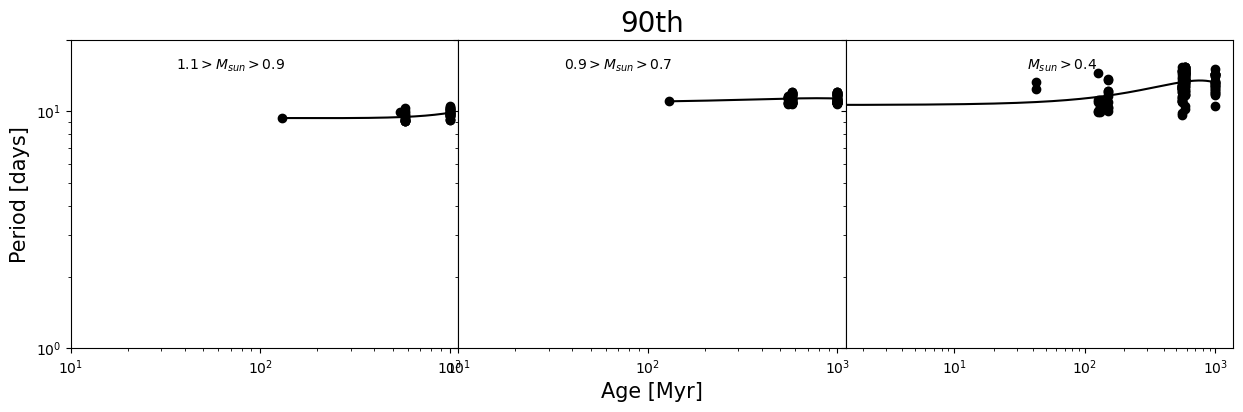

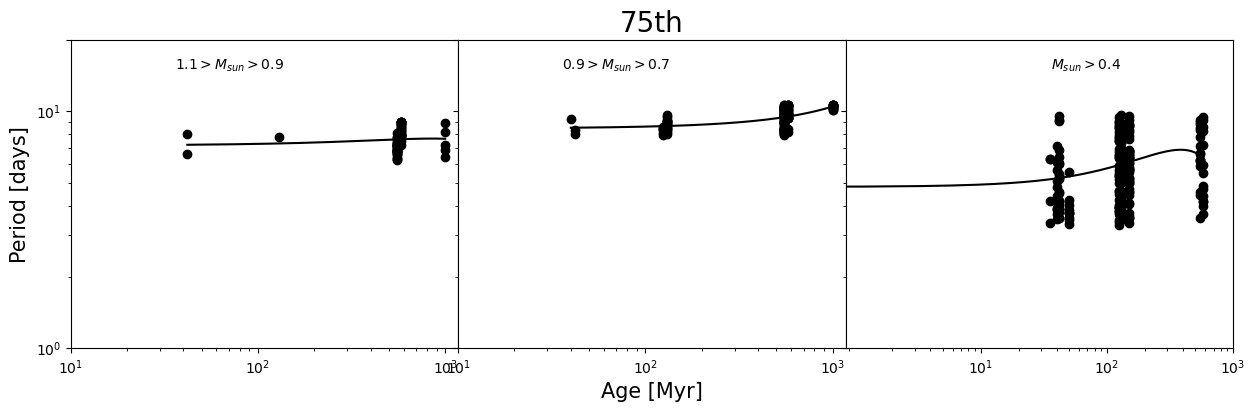

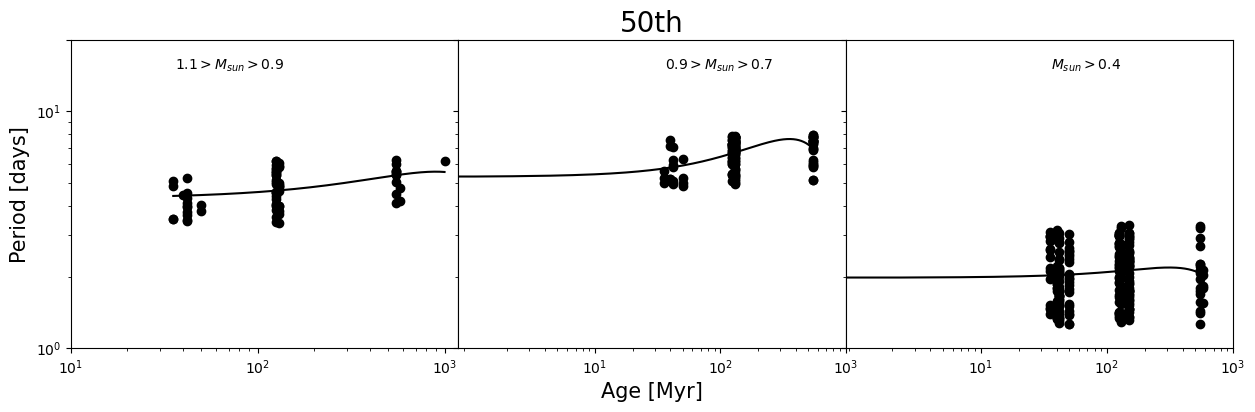

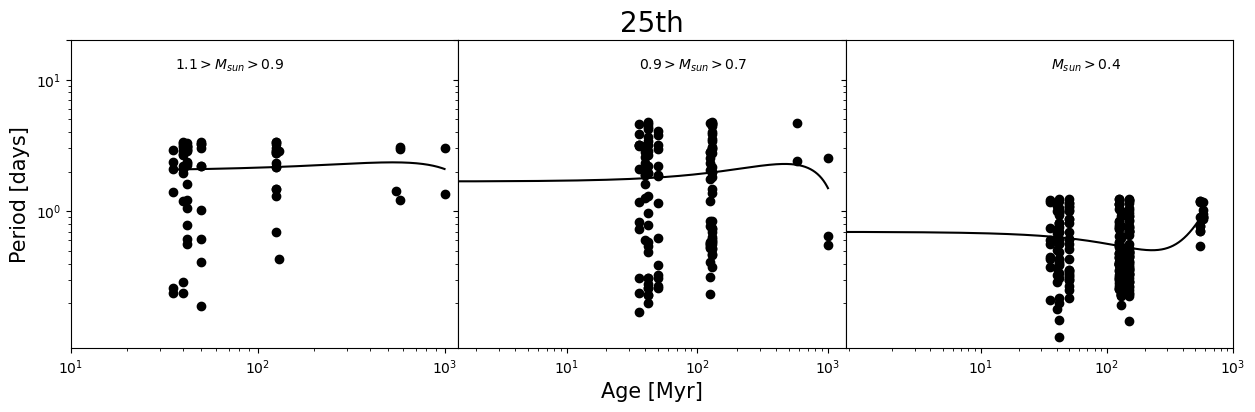

In [24]:
dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 4], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt21 = (m['Prot'] <= m.Prot.quantile(q = .9)) &(m['Prot'] >= m.Prot.quantile(q = .75))
    perc_90 = m[filt21]
    
    poly = np.polyfit(perc_90['Age'], perc_90['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_90['Age']), max(perc_90['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_90['Age'], perc_90['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_xscale('log')
    ax[n].set_xticks([10,100,1000])
    ax[n].set_yticks([1, 10, 20])

ax[0].text(36, 15, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 15, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 15, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('90th', size = 20)
#plt.savefig('final_perc90_mass_bin.png')

dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 4], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt22 = (m['Prot'] <= m.Prot.quantile(q = .75)) &(m['Prot'] >= m.Prot.quantile(q = .50))
    perc_75 = m[filt22]
    
    poly = np.polyfit(perc_75['Age'], perc_75['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_75['Age']), max(perc_75['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_75['Age'], perc_75['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_xscale('log')
    ax[n].set_xticks([10,100,1000])
    ax[n].set_yticks([1, 10, 20])

ax[0].text(36, 15, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 15, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 15, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('75th', size = 20)
#plt.savefig('final_perc75_mass_bin.png')

dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 4], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt23 = (m['Prot'] <= m.Prot.quantile(q = .50)) &(m['Prot'] >= m.Prot.quantile(q = .25))
    perc_50 = m[filt23]
    
    poly = np.polyfit(perc_50['Age'], perc_50['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_50['Age']), max(perc_50['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_50['Age'], perc_50['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_xscale('log')
    ax[n].set_xticks([10,100,1000])
    ax[n].set_yticks([1, 10, 20])
    
ax[0].text(36, 15, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 15, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 15, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('50th', size = 20)
#plt.savefig('final_perc50_mass_bin.png')

dat = [mass1, mass2, mass3]

fig, ax = plt.subplots(1,3, figsize = [15, 4], sharey = True)
fig.subplots_adjust(wspace=0)
for n, m in enumerate(dat):
    filt24 = (m['Prot'] <= m.Prot.quantile(q = .25)) 
    perc_25 = m[filt24]
    
    poly = np.polyfit(perc_25['Age'], perc_25['Prot'], 2)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(perc_25['Age']), max(perc_25['Age']), 500)
    
    ax[n].plot(xs1, fit(xs1), c = 'k')
    
    ax[n].scatter(perc_25['Age'], perc_25['Prot'], c = 'k')
    ax[n].set_yscale('log')
    ax[n].set_xscale('log')
    ax[n].set_xticks([10,100,1000])
    ax[n].set_yticks([1, 10, 20])
    
ax[0].text(36, 12, r'$1.1 > M_{sun} > 0.9$')
ax[1].text(36, 12, r'$0.9 > M_{sun} > 0.7$')
ax[2].text(36, 12, r'$M_{sun} > 0.4$')
ax[0].set_ylabel('Period [days]', size = 15)
ax[1].set_xlabel('Age [Myr]', size = 15)
ax[1].set_title('25th', size = 20)
#plt.savefig('final_perc25_mass_bin.png')

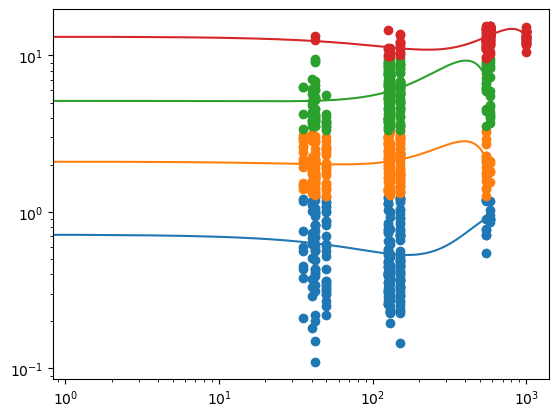

In [25]:
dat = [perc_25, perc_50, perc_75, perc_90]

for m in dat:
    poly = np.polyfit(m['Age'], m['Prot'], 3)
    fit = np.poly1d(poly)

    xs1 = np.linspace(min(m['Age']), max(m['Age']), 500)
    
    plt.plot(xs1, fit(xs1))
    plt.scatter(m['Age'], m['Prot'])
    plt.yscale('log')
    plt.xscale('log')
#plt.savefig('alltogether.png')

In [26]:
#10th, 50th, 75th percentiles

#period = 25.4 / (Omege/Omega sun)

#This is incredibly messy because I was trying to be fast. I apologize

filt81 = (mem['Prot'] <= mem.Prot.quantile(q = .10))
perc_10 = mem[filt81]
filt14 = (mem['Prot'] <= mem.Prot.quantile(q=.50)) & (mem['Prot'] >= mem.Prot.quantile(q = .10))
perc_50 = mem[filt14]
filt15 = (mem['Prot'] <= mem.Prot.quantile(q = .75)) & (mem['Prot'] >= mem.Prot.quantile(q=.50))
perc_75 = mem[filt15]

filt82 = (perc_10['Mass']>=0.9) & (perc_10['Mass']<=1.1)
mass1_10 = perc_10[filt82]
filt83 = (perc_10['Mass']>=0.7) & (perc_10['Mass']<=0.9)
mass2_10 = perc_10[filt83]
filt84 = (perc_10['Mass']>=0.4)
mass3_10 = perc_10[filt84]

filt821 = (perc_50['Mass']>=0.9) & (perc_50['Mass']<=1.1)
mass1_50 = perc_50[filt821]
filt831 = (perc_50['Mass']>=0.7) & (perc_50['Mass']<=0.9)
mass2_50 = perc_50[filt831]
filt841 = (perc_50['Mass']>=0.4)
mass3_50 = perc_50[filt841]

filt8211 = (perc_75['Mass']>=0.9) & (perc_75['Mass']<=1.1)
mass1_75 = perc_75[filt8211]
filt8311 = (perc_75['Mass']>=0.7) & (perc_75['Mass']<=0.9)
mass2_75 = perc_75[filt8311]
filt8411 = (perc_75['Mass']>=0.4)
mass3_75 = perc_75[filt8411]

In [27]:
#Make a data frame
#Need a summary of how many stars are in a cluster and how old it is
#Need mass and the period for each. Bin the 1.1 - 0.9, 0.9 - 0.7.
#Use 10th, 50th, 75th
#Find the percentage errrors
#data3.to_csv('rotation_data.txt', encoding='ascii')

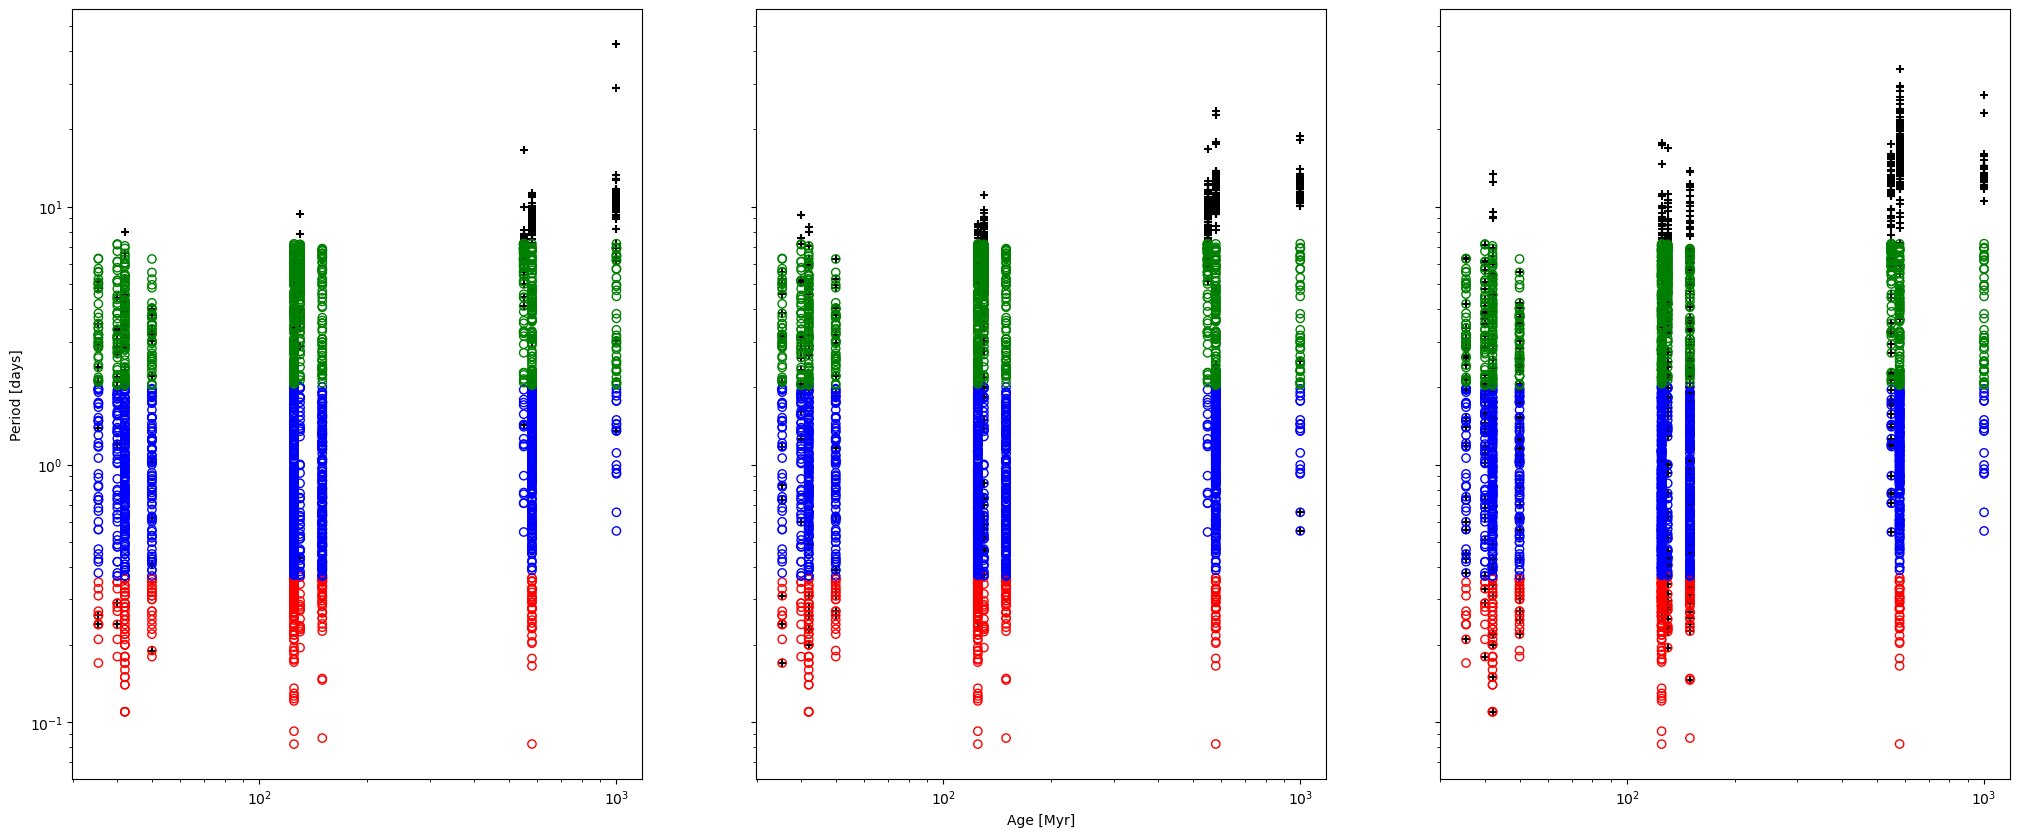

In [28]:
filt81 = (mem['Prot'] <= mem.Prot.quantile(q = .10))
perc_10 = mem[filt81]
filt14 = (mem['Prot'] <= mem.Prot.quantile(q=.50)) & (mem['Prot'] >= mem.Prot.quantile(q = .10))
perc_50 = mem[filt14]
filt15 = (mem['Prot'] <= mem.Prot.quantile(q = .75)) & (mem['Prot'] >= mem.Prot.quantile(q=.50))
perc_75 = mem[filt15]

dat = [mass1, mass2, mass3]
dat2 = [perc_10, perc_50, perc_75]
color = ['r', 'b', 'g']

fig, ax = plt.subplots(1, 3, figsize = [25,10],sharey=True)

for n, (m, p, c) in enumerate(zip(dat, dat2, color)):
    
    ax[0].scatter(p['Age'], p['Prot'], edgecolor = c, facecolor = 'none')
    ax[1].scatter(p['Age'], p['Prot'], edgecolor = c, facecolor = 'none')
    ax[2].scatter(p['Age'], p['Prot'], edgecolor = c, facecolor = 'none')
    ax[n].scatter(m['Age'], m['Prot'], color = 'k', marker = '+', zorder=0)
    ax[0].set_ylabel('Period [days]')
    ax[1].set_xlabel('Age [Myr]')
    ax[n].set_xscale('log')
    ax[n].set_yscale('log')
#plt.savefig('coloringpercs.png')

In [29]:
print('Amount of stars in each bin::', 'bin 1:',len(mass1), ', bin 2:',len(mass2), ', bin 3:',len(mass3))
#Mass bin 1 1.1 - 0.9 has percentage error 5.95%
#Mass bin 2 0.9 - 0.7 has percentage error 0.43%
#Mass bin 3 0.7 - 0.4 has percentage error 0.3%

Amount of stars in each bin:: bin 1: 282 , bin 2: 542 , bin 3: 1124


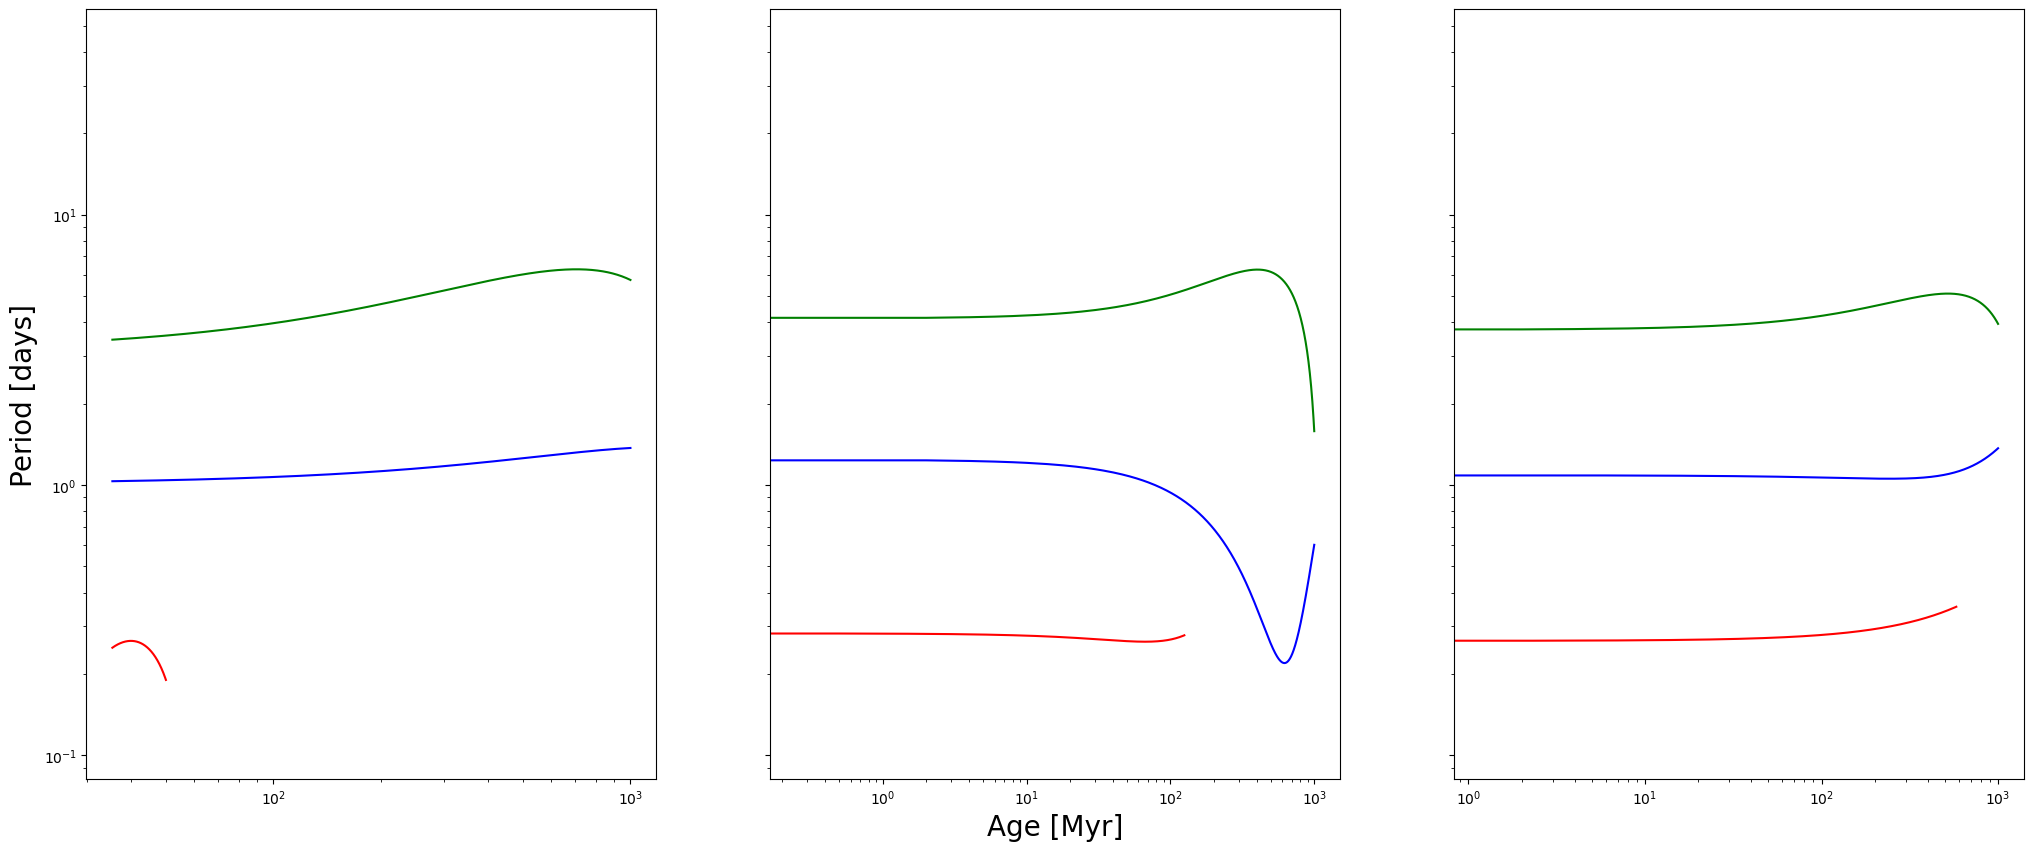

In [30]:
dat = [mass1, mass2, mass3]
dat2 = [perc_10, perc_50, perc_75]
dat3 = [mass1_10, mass1_50, mass1_75]
dat4 = [mass2_10, mass2_50, mass2_75]
dat5 = [mass3_10, mass3_50, mass3_75]
color = ['r', 'b', 'g']
fig, ax = plt.subplots(1, 3, figsize = [25,10],sharey=True)

for n, (m, p, p1, p2, p3,c) in enumerate(zip(dat, dat2, dat3, dat4, dat5, color)):

    poly1 = np.polyfit(p1['Age'], p1['Prot'], 2)
    fit1 = np.poly1d(poly1)
    xs1 = np.linspace(min(p1['Age']), max(p1['Age']), 500)
    
    poly2 = np.polyfit(p2['Age'], p2['Prot'], 2)
    fit2 = np.poly1d(poly2)
    xs2 = np.linspace(min(p2['Age']), max(p2['Age']), 500)
    
    poly3 = np.polyfit(p3['Age'], p3['Prot'], 2)
    fit3 = np.poly1d(poly3)
    xs3 = np.linspace(min(p3['Age']), max(p3['Age']), 500)
    
    ax[n].scatter(m['Age'], m['Prot'], color = 'none', zorder=0)    
    ax[0].plot(xs1, fit1(xs1), color = c)
    ax[1].plot(xs2, fit2(xs2), color = c)
    ax[2].plot(xs3, fit3(xs3), color = c)
    ax[0].set_ylabel('Period [days]', size = 20)
    ax[1].set_xlabel('Age [Myr]', size = 20)
    ax[n].set_xscale('log')
    ax[n].set_yscale('log')
    
plt.savefig('lines_only.png')

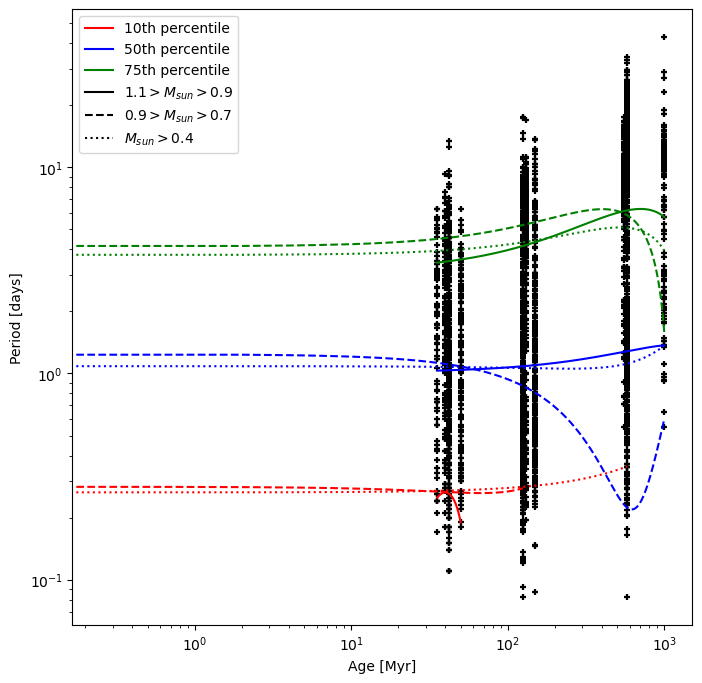

In [31]:
dat = [mass1, mass2, mass3]
dat2 = [perc_10, perc_50, perc_75]
dat3 = [mass1_10, mass1_50, mass1_75]
dat4 = [mass2_10, mass2_50, mass2_75]
dat5 = [mass3_10, mass3_50, mass3_75]
color = ['r', 'b', 'g']
plt.figure(figsize = [8,8])
for n, (m, p, p1, p2, p3,c) in enumerate(zip(dat, dat2, dat3, dat4, dat5, color)):

    poly1 = np.polyfit(p1['Age'], p1['Prot'], 2)
    fit1 = np.poly1d(poly1)
    xs1 = np.linspace(min(p1['Age']), max(p1['Age']), 500)
    
    poly2 = np.polyfit(p2['Age'], p2['Prot'], 2)
    fit2 = np.poly1d(poly2)
    xs2 = np.linspace(min(p2['Age']), max(p2['Age']), 500)
    
    poly3 = np.polyfit(p3['Age'], p3['Prot'], 2)
    fit3 = np.poly1d(poly3)
    xs3 = np.linspace(min(p3['Age']), max(p3['Age']), 500)
    
      
    plt.plot(xs1, fit1(xs1), color = c, linestyle = 'solid', label = r'$1.1 > M_{sun} > 0.9$')
    plt.plot(xs2, fit2(xs2), color = c, linestyle = 'dashed', label = r'$0.9 > M_{sun} > 0.7$')
    plt.plot(xs3, fit3(xs3), color = c, linestyle = 'dotted', label = r'$M_{sun} > 0.4$')
    plt.scatter(mem['Age'], mem['Prot'], marker = '+', c = 'k', zorder = 0, s = 20)
    plt.ylabel('Period [days]')
    plt.xlabel('Age [Myr]')
    plt.xscale('log')
    plt.yscale('log')
line1 = Line2D([0], [0], label='10th percentile', color='r')
line2 = Line2D([0], [0], label='50th percentile', color='b')
line3 = Line2D([0], [0], label='75th percentile', color='g')
line4 = Line2D([0], [0], label=r'$1.1 > M_{sun} > 0.9$', color='k', linestyle = 'solid')
line5 = Line2D([0], [0], label=r'$0.9 > M_{sun} > 0.7$', color='k', linestyle = 'dashed')
line6 = Line2D([0], [0], label=r'$M_{sun} > 0.4$', color='k', linestyle = 'dotted')
plt.legend(handles = [line1, line2, line3, line4, line5, line6])
#plt.savefig('lines_only_new_withdots.png')

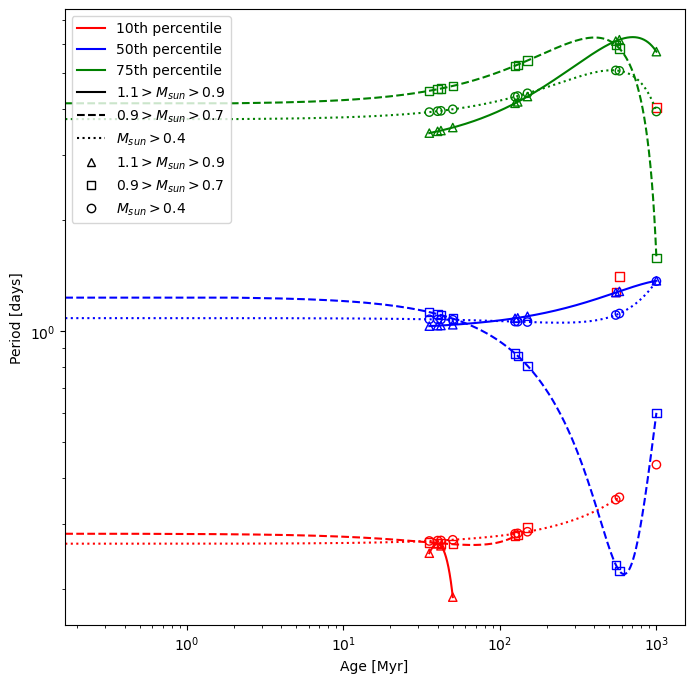

In [32]:
dat = [mass1, mass2, mass3]
dat2 = [perc_10, perc_50, perc_75]
dat3 = [mass1_10, mass1_50, mass1_75]
dat4 = [mass2_10, mass2_50, mass2_75]
dat5 = [mass3_10, mass3_50, mass3_75]
color = ['r', 'b', 'g']
plt.figure(figsize = [8,8])
for n, (m, p, p1, p2, p3,c) in enumerate(zip(dat, dat2, dat3, dat4, dat5, color)):

    poly1 = np.polyfit(p1['Age'], p1['Prot'], 2)
    fit1 = np.poly1d(poly1)
    xs1 = np.linspace(min(p1['Age']), max(p1['Age']), 500)
    
    poly2 = np.polyfit(p2['Age'], p2['Prot'], 2)
    fit2 = np.poly1d(poly2)
    xs2 = np.linspace(min(p2['Age']), max(p2['Age']), 500)
    
    poly3 = np.polyfit(p3['Age'], p3['Prot'], 2)
    fit3 = np.poly1d(poly3)
    xs3 = np.linspace(min(p3['Age']), max(p3['Age']), 500)
    
      
    plt.plot(xs1, fit1(xs1), color = c, linestyle = 'solid')
    plt.plot(xs2, fit2(xs2), color = c, linestyle = 'dashed')
    plt.plot(xs3, fit3(xs3), color = c, linestyle = 'dotted')
    
    xs1 = [  42. ,   40. ,   50. ,   35.4, 125. ,  130. ,  150. , 550. ,  580. , 1000. ]
    xs2 = [  42. ,   40. ,   50. ,   35.4, 125. ,  130. ,  150. , 550. ,  580. , 1000. ]
    xs3 = [  42. ,   40. ,   50. ,   35.4, 125. ,  130. ,  150. , 550. ,  580. , 1000. ]
    
    plt.scatter(xs1, fit1(xs1), color = c, marker = '^', facecolor = 'none')
    plt.scatter(xs2, fit2(xs2), color = c, marker = 's', facecolor = 'none')
    plt.scatter(xs3, fit3(xs3), color = c, marker = 'o', facecolor = 'none')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    
    plt.ylabel('Period [days]')
    plt.xlabel('Age [Myr]')
    plt.xscale('log')
    plt.yscale('log')
line1 = Line2D([0], [0], label='10th percentile', color='r')
line2 = Line2D([0], [0], label='50th percentile', color='b')
line3 = Line2D([0], [0], label='75th percentile', color='g')
line4 = Line2D([0], [0], label=r'$1.1 > M_{sun} > 0.9$', color='k', linestyle = 'solid')
line5 = Line2D([0], [0], label=r'$0.9 > M_{sun} > 0.7$', color='k', linestyle = 'dashed')
line6 = Line2D([0], [0], label=r'$M_{sun} > 0.4$', color='k', linestyle = 'dotted')
point1 = Line2D([0], [0], label = r'$1.1 > M_{sun} > 0.9$', color = 'k', marker = '^', 
markeredgecolor='k', markerfacecolor='none', linestyle='')
point2 = Line2D([0], [0], label = r'$0.9 > M_{sun} > 0.7$', color = 'k', marker = 's', 
markeredgecolor='k', markerfacecolor='none', linestyle='')
point3 = Line2D([0], [0], label = r'$M_{sun} > 0.4$', color = 'k', marker = 'o', 
markeredgecolor='k', markerfacecolor='none', linestyle='')
handles.extend([line1, line2, line3, line4, line5, line6, point1, point2, point3])
plt.legend(handles = handles)
#plt.savefig('poly_fit_scatter.png')

In [33]:
print(data3.Cluster.unique())
print(data3.Age.unique())

['IC_2391      ' 'Collinder_135' 'NGC_2451A    ' 'NGC_2547     '
 'IC_2602      ' 'NGC2547 ' 'Pleiades' 'M50     ' 'NGC2516 ' 'M37     '
 'Praesepe' 'NGC6811 ']
[  42.    40.    50.    35.4    0.   125.   130.   150.   550.   580.
 1000. ]


In [34]:
NGC6811['Prot'].describe(percentiles = [.1, .25, .5, .75, .9])

count    232.000000
mean      10.001198
std        5.098003
min        0.552864
10%        2.300963
25%        8.128200
50%       10.890338
75%       12.166690
90%       13.493842
max       42.699135
Name: Prot, dtype: float64

In [35]:
NGC6811['Age']

3260    1000
3261    1000
3262    1000
3263    1000
3264    1000
        ... 
3487    1000
3488    1000
3489    1000
3490    1000
3491    1000
Name: Age, Length: 232, dtype: int64

In [36]:
#Creating a dataframe with only rotaion and Cluster name
mass1pc = mass1[['Prot', 'Cluster']] #1.1 - 0.9 bin
mass2pc = mass2[['Prot', 'Cluster']] #0.9 - 0.7 bin
mass3pc = mass3[['Prot', 'Cluster']] #0.7 - 0.4 bin

In [92]:
pd.set_option('display.max_columns', 5000)
massbin1perc = mass1pc.groupby(['Cluster']).describe(percentiles = [.1, .25, .5, .75, .9])

massbin2perc = mass2pc.groupby(['Cluster']).describe(percentiles = [.1, .25, .5, .75, .9])

massbin3perc = mass3pc.groupby(['Cluster']).describe(percentiles = [.1, .25, .5, .75, .9])

In [93]:
print('bin 1.1 - 0.9', massbin1perc, '                   ')

print('bin 0.9 - 0.7',massbin2perc, '                   ')

print('bin 0.7 - 0.4', massbin3perc, '                   ')

bin 1.1 - 0.9                Prot                                                     \
              count       mean       std       min       10%       25%   
Cluster                                                                  
Collinder_135  14.0   2.397857  1.185244  0.240000  0.563000  1.977500   
IC_2391         9.0   3.852222  1.725918  2.250000  2.306000  3.090000   
IC_2602        19.0   2.869474  1.628617  0.560000  0.756000  1.405000   
M37            47.0   6.837844  1.909312  1.421387  5.438673  6.275048   
M50            17.0   4.771941  1.966863  0.436000  3.183600  3.790000   
NGC6811        56.0  10.843292  5.433834  1.351842  7.693448  9.596615   
NGC_2451A      12.0   2.277500  1.384598  0.190000  0.431000  0.920000   
NGC_2547       10.0   2.624000  1.696042  0.240000  0.258000  1.565000   
Pleiades       39.0   3.929795  1.479258  0.689700  2.026680  2.868850   
Praesepe       47.0   8.325111  2.015158  1.210500  6.226160  7.947650   

                       

In [39]:
len(mass3)

1124

In [40]:
data5 = pd.read_excel(r"C:\Users\callo\SURP Project\Tables-data\Luckeydoo_Table.xlsx")
data5

,Cluster,Count_bin1,10thbin1,10thbin1_e,25thbin1,25thbin1_e,50thbin1,50thbin1_e,75thbin1,75thbin1_e,90thbin1,90thbin1_e,count_bin2,10thbin2,10thbin2_e,25thbin2,25thbin2_e,50thbin2,50thbin2_e,75thbin2,75thbin2_e,90thbin2,90thbin2_e,count_bin3,10thbin3,10thbin3_e,25thbin3,25thbin3_e,50thbin3,50thbin3_e,75thbin3,75thbin3_e,90thbin3,90thbin3_e,Age
0,Collinder135,14.0,0.563000,0.0134,1.977500,0.00845,2.710000,0.00597,3.142500,0.00845,3.344000,0.0134,17.0,1.470000,0.00965,1.890000,0.00609,2.800000,0.0043,5.170000,0.00609,7.338000,0.00965,46,0.565000,0.00668,1.332500,0.00422,1.865000,0.00298,3.800000,0.00422,4.950000,0.00668,40.0
1,IC2391,9.0,2.306000,0.0134,3.090000,0.00845,3.430000,0.00597,3.980000,0.00845,5.230000,0.0134,18.0,0.260000,0.00965,0.677500,0.00609,3.960000,0.0043,4.892500,0.00609,5.973000,0.00965,32,0.582000,0.00668,0.970000,0.00422,1.510000,0.00298,2.195000,0.00422,3.817000,0.00668,42.0
2,IC2602,19.0,0.756000,0.0134,1.405000,0.00845,2.990000,0.00597,3.695000,0.00845,4.506000,0.0134,16.0,0.255000,0.00965,0.445000,0.00609,1.640000,0.0043,2.955000,0.00609,6.495000,0.00965,62,0.430000,0.00668,0.860000,0.00422,1.840000,0.00298,3.975000,0.00422,6.065000,0.00668,42.0
3,M37,47.0,5.438673,0.0134,6.275048,0.00845,6.835223,0.00597,7.254002,0.00845,7.738589,0.0134,105.0,7.129837,0.00965,7.994629,0.00609,9.066482,0.0043,10.262983,0.00609,11.299668,0.00965,84,1.218866,0.00668,2.255382,0.00422,9.120897,0.00298,12.657060,0.00422,14.797462,0.00668,550.0
4,M50,17.0,3.183600,0.0134,3.790000,0.00845,4.770000,0.00597,5.800000,0.00845,6.753800,0.0134,101.0,0.698000,0.00965,3.524000,0.00609,6.515000,0.0043,7.476000,0.00609,8.614000,0.00965,104,0.289000,0.00668,0.645500,0.00422,3.554500,0.00298,6.207750,0.00422,8.386300,0.00668,130.0
5,NGC6811,56.0,7.693448,0.0134,9.596615,0.00845,10.232094,0.00597,10.910352,0.00845,12.218562,0.0134,77.0,10.417713,0.00965,10.817889,0.00609,11.197134,0.0043,12.167730,0.00609,12.973844,0.00965,31,11.918355,0.00668,12.563227,0.00422,13.318612,0.00298,14.430000,0.00422,15.725924,0.00668,1000.0
6,NGC2451A,12.0,0.431000,0.0134,0.920000,0.00845,2.615000,0.00597,3.282500,0.00845,3.764000,0.0134,18.0,0.298000,0.00965,0.450000,0.00609,2.050000,0.0043,3.985000,0.00609,5.058000,0.00965,62,0.321000,0.00668,0.612500,0.00422,1.390000,0.00298,2.492500,0.00422,3.702000,0.00668,50.0
7,NGC2547,10.0,0.258000,0.0134,1.565000,0.00845,2.640000,0.00597,3.517500,0.00845,4.875000,0.0134,16.0,0.275000,0.00965,0.805000,0.00609,3.155000,0.0043,4.040000,0.00609,5.120000,0.00965,28,0.444000,0.00668,1.072500,0.00422,2.035000,0.00298,2.960000,0.00422,3.633000,0.00668,35.4
8,Pleiades,39.0,2.026680,0.0134,2.868850,0.00845,4.025500,0.00597,5.250450,0.00845,5.724320,0.0134,51.0,0.550300,0.00965,1.903300,0.00609,6.129600,0.0043,7.250050,0.00609,7.947100,0.00965,131,0.397600,0.00668,0.753350,0.00422,2.486100,0.00298,5.355600,0.00422,8.560500,0.00668,125.0
9,Praesepe,47.0,6.226160,0.0134,7.947650,0.00845,8.924600,0.00597,9.164650,0.00845,9.934760,0.0134,80.0,9.452940,0.00965,10.266400,0.00609,11.325650,0.0043,12.569800,0.00609,13.461530,0.00965,164,4.474590,0.00668,13.417725,0.00422,15.517150,0.00298,18.554525,0.00422,21.612210,0.00668,580.0


In [41]:
data5.to_csv('Perc_table.xlsx', encoding='ascii')

In [96]:
data6 = pd.read_excel(r"C:\Users\callo\SURP Project\Tables-data\Luckeydoo_table_Godoy_Rivera.xlsx")
data6

,Cluster,10thbin1,10thbin1_e,50thbin1,50thbin1_e,75thbin1,75thbin1_e,10thbin2,10thbin2_e,50thbin2,50thbin2_e,75thbin2,75thbin2_e,10thbin3,10thbin3_e,50thbin3,50thbin3_e,75thbin3,75thbin3_e,Age
0,IC2391,NaN,NaN,NaN,NaN,NaN,NaN,0.2588,NaN,2.60,NaN,5.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pleaides,0.6686,NaN,4.04,NaN,5.16,NaN,0.4131,NaN,5.95,NaN,7.08,NaN,0.3310,NaN,1.393,NaN,3.18,NaN,125.0
2,M50,1.6480,NaN,4.91,NaN,7.51,NaN,0.5891,NaN,6.00,NaN,7.91,NaN,0.3517,NaN,1.478,NaN,3.74,NaN,130.0
3,NGC2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3622,NaN,2.205,NaN,4.97,NaN,150.0
4,M37,6.7700,NaN,7.79,NaN,8.61,NaN,6.8600,NaN,9.66,NaN,10.70,NaN,0.6242,NaN,2.262,NaN,12.90,NaN,550.0
5,Praesepe,8.7000,NaN,8.91,NaN,9.30,NaN,4.2800,NaN,10.08,NaN,12.04,NaN,1.1530,NaN,7.740,NaN,18.30,NaN,580.0
6,NGC 6811,10.4000,NaN,10.80,NaN,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0


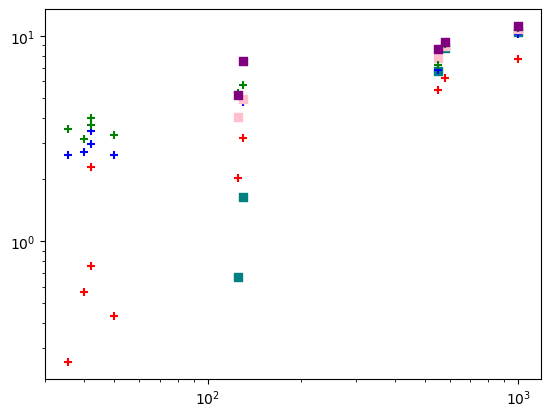

In [112]:
dat1 = [data5['10thbin1'], data5['50thbin1'], data5['75thbin1']]
dat2 = [data5['10thbin2'], data5['50thbin2'], data5['75thbin2']]
dat3 = [data5['10thbin3'], data5['50thbin3'], data5['75thbin3']]
dat4 = [data6['10thbin1'], data6['50thbin1'], data6['75thbin1']]
dat5 = [data6['10thbin2'], data6['50thbin2'], data6['75thbin2']]
dat6 = [data6['10thbin3'], data6['50thbin3'], data6['75thbin3']]
color1 = ['r', 'b', 'g']
color2 = ['teal', 'pink', 'purple']

for n, (dat1, dat2, dat3, dat4, dat5, dat6, c1, c2) in enumerate(zip(dat1, dat2, dat3, dat4, dat5, dat6, color1, color2)):
    plt.scatter(data5['Age'], dat1, color = c1, marker = '+')
    plt.scatter(data6['Age'], dat4, color = c2, marker = 's')
    plt.xscale('log')
    plt.yscale('log')

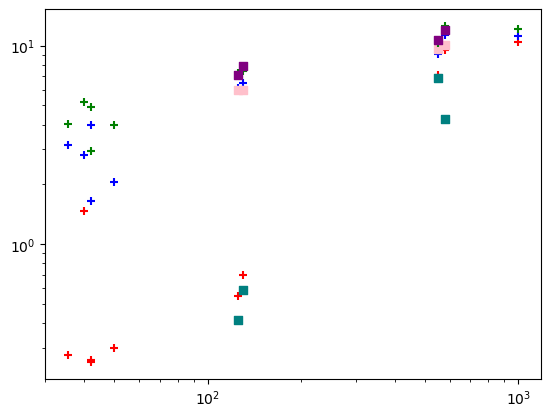

In [114]:
dat1 = [data5['10thbin1'], data5['50thbin1'], data5['75thbin1']]
dat2 = [data5['10thbin2'], data5['50thbin2'], data5['75thbin2']]
dat3 = [data5['10thbin3'], data5['50thbin3'], data5['75thbin3']]
dat4 = [data6['10thbin1'], data6['50thbin1'], data6['75thbin1']]
dat5 = [data6['10thbin2'], data6['50thbin2'], data6['75thbin2']]
dat6 = [data6['10thbin3'], data6['50thbin3'], data6['75thbin3']]
color1 = ['r', 'b', 'g']
color2 = ['teal', 'pink', 'purple']

for n, (dat1, dat2, dat3, dat4, dat5, dat6, c1, c2) in enumerate(zip(dat1, dat2, dat3, dat4, dat5, dat6, color1, color2)):
    plt.scatter(data5['Age'], dat2, color = c1, marker = '+')
    plt.scatter(data6['Age'], dat5, color = c2, marker = 's')
    plt.xscale('log')
    plt.yscale('log')

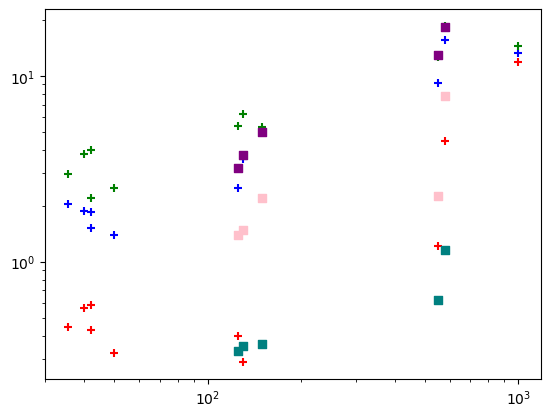

In [124]:
dat1 = [data5['10thbin1'], data5['50thbin1'], data5['75thbin1']]
dat2 = [data5['10thbin2'], data5['50thbin2'], data5['75thbin2']]
dat3 = [data5['10thbin3'], data5['50thbin3'], data5['75thbin3']]
dat4 = [data6['10thbin1'], data6['50thbin1'], data6['75thbin1']]
dat5 = [data6['10thbin2'], data6['50thbin2'], data6['75thbin2']]
dat6 = [data6['10thbin3'], data6['50thbin3'], data6['75thbin3']]
color1 = ['r', 'b', 'g']
color2 = ['teal', 'pink', 'purple']

for n, (dat1, dat2, dat3, dat4, dat5, dat6, c1, c2) in enumerate(zip(dat1, dat2, dat3, dat4, dat5, dat6, color1, color2)):
    plt.scatter(data5['Age'], dat3, color = c1, marker = '+')
    plt.scatter(data6['Age'], dat6, color = c2, marker = 's')
    plt.xscale('log')
    plt.yscale('log')
